
--- A1: Comparing Low vs High ---
Centroid Low: [-255.71056    161.10547     26.923302    18.558825   -16.346708
    8.012779   -11.646695    -9.232422    -7.727251    -1.7303113
   -8.566899    -1.7720706   -5.518343 ]
Centroid High: [-266.1733     160.4016      24.199047    21.868479   -18.507023
    1.6432608  -11.243318   -13.653975    -9.319429    -4.0279036
   -9.007456    -2.2723207   -7.7358384]
Spread (std) Low: [50.7829    17.821888  11.829453  12.226978  11.455935  10.072734
  9.415359   5.296514   7.436447   5.127342   4.501444   3.9232433
  3.2204154]
Spread (std) High: [34.963634  13.172583  15.376377   8.08246   13.695095  11.070007
 11.011054   6.909212   7.400561   5.400159   4.2389946  4.743198
  4.000181 ]
Euclidean distance between centroids: 14.3689


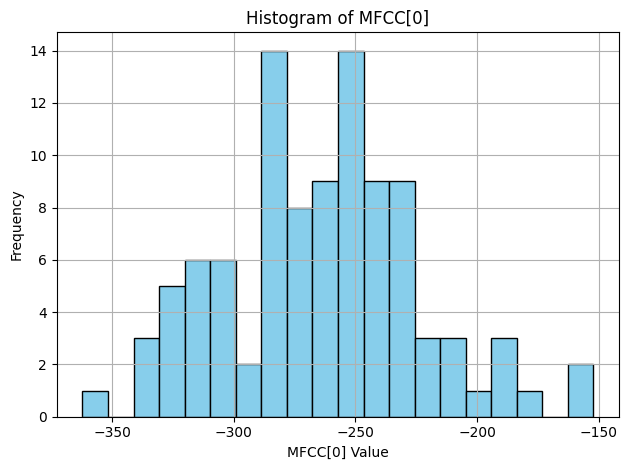


Mean of MFCC[0]: -263.96
Variance of MFCC[0]: 1627.00
[-282.35214    157.95935     23.353222    13.302103   -16.652689
    9.644454   -23.930637   -19.051085     4.4749327   -8.866889
   -9.781219     0.8308053   -7.4156985]
[-152.11627    139.07611     15.060701    35.094036   -29.97244
   32.60676    -30.82085      4.0791607  -15.024461     7.305511
  -12.429152     5.4339833   -8.04915  ]


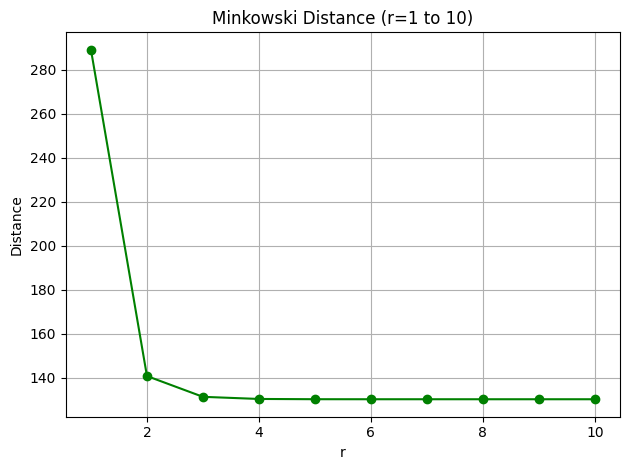

r = 1: Distance = 289.0624
r = 2: Distance = 140.7805
r = 3: Distance = 131.3386
r = 4: Distance = 130.3680
r = 5: Distance = 130.2531
r = 6: Distance = 130.2383
r = 7: Distance = 130.2362
r = 8: Distance = 130.2359
r = 9: Distance = 130.2359
r = 10: Distance = 130.2359

A6: Accuracy on test set: 57.14%

A7: Predicted labels for test samples: [1 1 1 1 1]


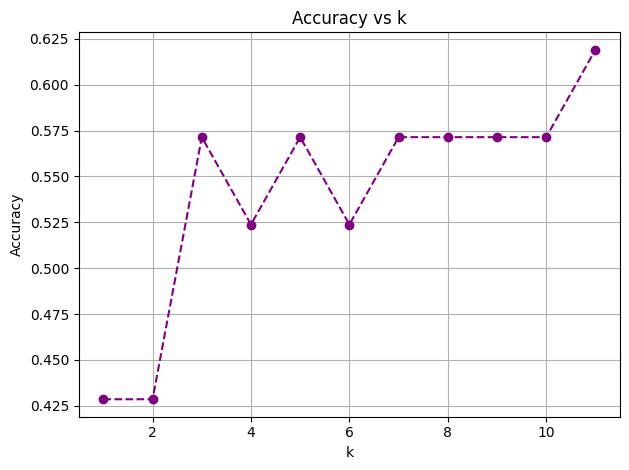


Confusion Matrix (Train set):
[[12  3]
 [ 4 28]]

Classification Report (Train set):
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.90      0.88      0.89        32

    accuracy                           0.85        47
   macro avg       0.83      0.84      0.83        47
weighted avg       0.85      0.85      0.85        47


Confusion Matrix (Test set):
[[ 1  6]
 [ 3 11]]

Classification Report (Test set):
              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.65      0.79      0.71        14

    accuracy                           0.57        21
   macro avg       0.45      0.46      0.45        21
weighted avg       0.51      0.57      0.53        21

0.27963525835866265


In [2]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# --- CONFIGURATION ---
CSV_PATH = "classified_audios.csv"
n_mfcc = 13

# --- Load metadata ---
def load_audio_metadata(csv_path):
    df = pd.read_csv(csv_path)
    return df["File Path"].tolist(), df["Classification"].tolist()

# --- Extract MFCC features ---
def extract_mfcc(filepath, n_mfcc=13):
    try:
        y, sr = librosa.load(filepath, sr=None)
        if len(y) < sr // 2 or np.max(np.abs(y)) < 0.01:
            raise ValueError("Audio too short or silent")
        y = y / np.max(np.abs(y))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return np.mean(mfcc, axis=1)
    except Exception as e:
        print(f"Error processing {os.path.basename(filepath)}: {e}")
        return None

# --- Build class_features dictionary ---
def build_class_features(file_paths, labels):
    class_features = defaultdict(list)
    all_mfcc0 = []

    for path, label in zip(file_paths, labels):
        mfcc_vec = extract_mfcc(path)
        if mfcc_vec is not None:
            class_features[label].append(mfcc_vec)
            all_mfcc0.append(mfcc_vec[0])
    return class_features, all_mfcc0

# --- A1: Intraclass spread and interclass distance ---
def analyze_class_stats(class_features, class1, class2):
    data1 = np.array(class_features[class1])
    data2 = np.array(class_features[class2])

    centroid1 = data1.mean(axis=0)
    centroid2 = data2.mean(axis=0)
    std1 = data1.std(axis=0)
    std2 = data2.std(axis=0)
    interclass_distance = np.linalg.norm(centroid1 - centroid2)

    print(f"\n--- A1: Comparing {class1} vs {class2} ---")
    print(f"Centroid {class1}: {centroid1}")
    print(f"Centroid {class2}: {centroid2}")
    print(f"Spread (std) {class1}: {std1}")
    print(f"Spread (std) {class2}: {std2}")
    print(f"Euclidean distance between centroids: {interclass_distance:.4f}")

# --- A2: Histogram of MFCC[0] ---
def plot_mfcc0_histogram(all_mfcc0):
    all_mfcc0 = np.array(all_mfcc0)
    plt.hist(all_mfcc0, bins=20, color='skyblue', edgecolor='black')
    plt.title("Histogram of MFCC[0]")
    plt.xlabel("MFCC[0] Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nMean of MFCC[0]: {np.mean(all_mfcc0):.2f}")
    print(f"Variance of MFCC[0]: {np.var(all_mfcc0):.2f}")

# --- A3: Minkowski distance plot ---
def plot_minkowski_distance(class_features):
    all_vectors = [vec for vecs in class_features.values() for vec in vecs]
    vec1, vec2 = all_vectors[0], all_vectors[1]
    print(vec1)
    print(vec2)
    r_values = range(1, 11)
    distances = [distance.minkowski(vec1, vec2, p=r) for r in r_values]

    plt.plot(r_values, distances, marker='o', color='green')
    plt.title("Minkowski Distance (r=1 to 10)")
    plt.xlabel("r")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    for r, d in zip(r_values, distances):
        print(f"r = {r}: Distance = {d:.4f}")

# --- A4: Train-test split for two classes ---
def perform_train_test_split(class_features, class1, class2, test_ratio=0.3):
    X = np.array(class_features[class1] + class_features[class2])
    y = np.array([0] * len(class_features[class1]) + [1] * len(class_features[class2]))
    return train_test_split(X, y, test_size=test_ratio, random_state=42)

# --- A5: Train kNN ---
def train_knn_classifier(X_train, y_train, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# --- A6: Evaluate accuracy ---
def evaluate_knn_accuracy(model, X_test, y_test):
    acc = model.score(X_test, y_test)
    print(f"\nA6: Accuracy on test set: {acc * 100:.2f}%")
    return acc

# --- A7: Predict samples ---
def predict_test_samples(model, X_test):
    preds = model.predict(X_test)
    print("\nA7: Predicted labels for test samples:", preds[:5])
    return preds

# --- A8: Accuracy vs k plot ---
def accuracy_vs_k_plot(X_train, X_test, y_train, y_test):
    k_values = range(1, 12)
    accuracies = []

    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        accuracies.append(acc)

    plt.plot(k_values, accuracies, marker='o', linestyle='--', color='purple')
    plt.title("Accuracy vs k")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return accuracies

# --- A9: Confusion matrix and report ---
def evaluate_confusion_metrics(model, X, y, label=""):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    print(f"\nConfusion Matrix ({label} set):\n{cm}")
    print(f"\nClassification Report ({label} set):\n{classification_report(y, y_pred)}")

# --- MAIN EXECUTION ---
def run_knn_analysis(csv_path="classified_audios.csv", class1="Low", class2="High"):
    paths, labels = load_audio_metadata(csv_path)
    class_features, all_mfcc0 = build_class_features(paths, labels)

    if class1 not in class_features or class2 not in class_features:
        print("Selected classes not found.")
        return

    analyze_class_stats(class_features, class1, class2)       # A1
    plot_mfcc0_histogram(all_mfcc0)                          # A2
    plot_minkowski_distance(class_features)                 # A3

    X_train, X_test, y_train, y_test = perform_train_test_split(class_features, class1, class2)  # A4
    knn_model = train_knn_classifier(X_train, y_train, k=3)                                     # A5
    evaluate_knn_accuracy(knn_model, X_test, y_test)                                            # A6
    predict_test_samples(knn_model, X_test)                                                     # A7
    accuracy_vs_k_plot(X_train, X_test, y_train, y_test)                                        # A8
    evaluate_confusion_metrics(knn_model, X_train, y_train, label="Train")                      # A9
    evaluate_confusion_metrics(knn_model, X_test, y_test, label="Test")                         # A9
    train_acc = knn_model.score(X_train, y_train)
    test_acc = knn_model.score(X_test, y_test)
    print(train_acc-test_acc)
# Run the pipeline
run_knn_analysis("classified_audios.csv", class1="Low", class2="High")